In [1]:
# Do all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [2]:
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

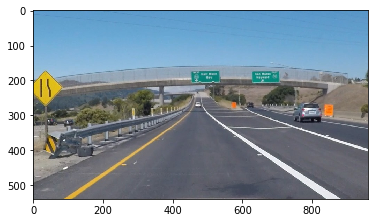

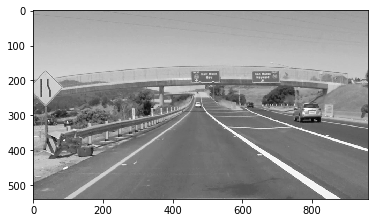

In [11]:
plt.figure()
plt.imshow(image, cmap='Greys_r')
plt.show()
plt.imshow(gray, cmap = 'Greys_r')
plt.show()

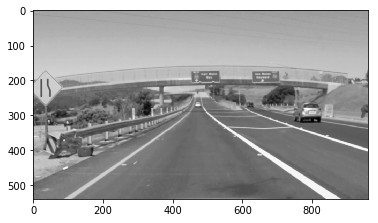

In [34]:
kernel_size = 5 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
plt.imshow(blur_gray, cmap = 'Greys_r')
plt.show()

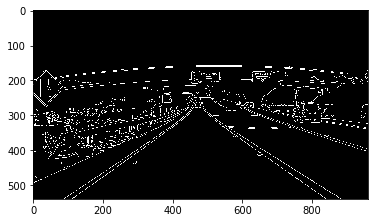

In [47]:
# Define our parameters for Canny and run it
low_threshold = 50
high_threshold = 150
edges  = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')
plt.show()

In [146]:
#Create a mask
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges) #Create an array with the same shape as 'edges'
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
y_mult = 0.5
x_mult = 0.1
vertices = np.array([[(0.1*imshape[1],imshape[0]),(0.4*imshape[1], 0.5*imshape[0]), (0.5*imshape[1], 0.3*imshape[0]), (0.9*imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)


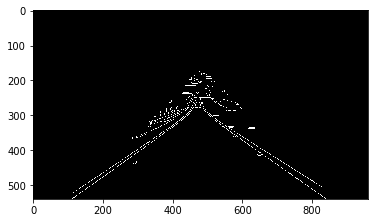

In [147]:
# Display the image
plt.imshow(masked_edges, cmap='Greys_r')
plt.show()

In [206]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 100
min_line_length = 300
max_line_gap = 50
line_image = np.copy(image)*0 #creating a blank to draw lines on

In [207]:
# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
#lines is outputted as a 4 values for  (x1, y1, x2, y2)
lines.shape[0] #Theoretically this should only be 4

4

In [208]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),10)


In [209]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

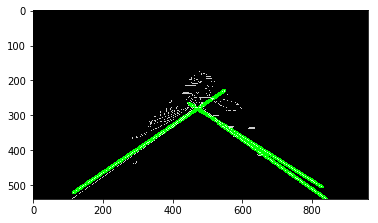

In [210]:
# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)
plt.show()